# HABERMAN CANCEL SURVIVAL PREDICTION


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv('haberman.csv')
print(haberman.head())

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


# age  year  nodes  status

In [3]:
haberman['1.1'].value_counts()

1    224
2     81
Name: 1.1, dtype: int64

# ATTRIBUTE INFORMATION:
Age of patient at time of operation (numerical) Patient's year of operation (year - 1900, numerical) Number of positive axillary nodes detected (numerical) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

OBJECTIVE
There are 3 attributes i.e age , year of operation and nodes. Based on these 3 features we have to determine whether the patient dies within 5 years or lives for 5 years and longer.

AGE VS NODES 2D SCATTER PLOT

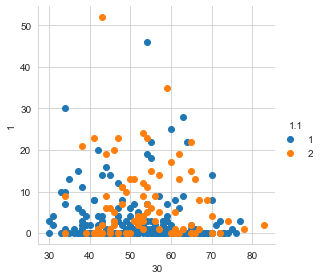

In [5]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="1.1", size=4) \
   .map(plt.scatter, "30", "1") \
   .add_legend();
plt.show();

# OBSERVATION:- From the above plot, it's very hard to distinguish between status 1 and 2, though we notice most of blue points(status 1) lies between 0 and 10 of nodes.

# PAIR PLOT

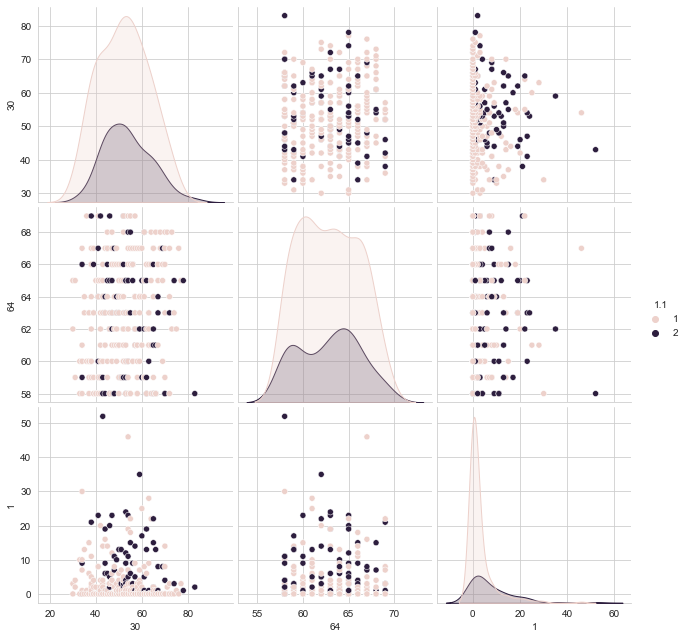

In [6]:
sns.set_style("whitegrid");
sns.pairplot(haberman, vars=["30","64","1"],hue="1.1", size=3);
plt.show()

OBSERVATION: The pair plots is not seperating the datasets thus increasing chances of error than accuracy though nodes vs year is little better but not enough to serve our purpose.

# BOX PLOT ( NODES )

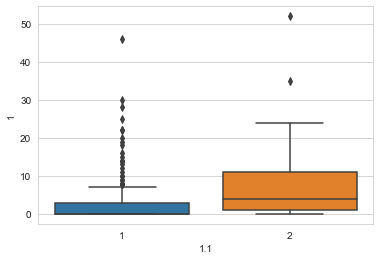

In [7]:
sns.boxplot(x='1.1',y='1', data=haberman)
plt.show()

# VIOLIN PLOT ( NODES )

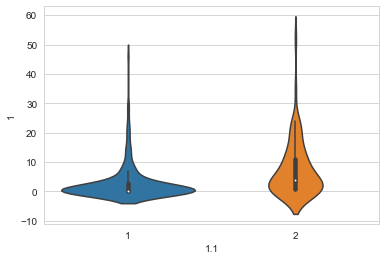

In [8]:
sns.violinplot(x="1.1", y="1", data=haberman, size=8)
plt.show()

OBSERVATION: It's very hard to predict after considering the box and violin plots as if I take the node value between 0.0 and 0.2 in the box plot then 50 percentile of values which fall under status 2 will be misinterpreted or wrongly classified.

# CDF on Nodes

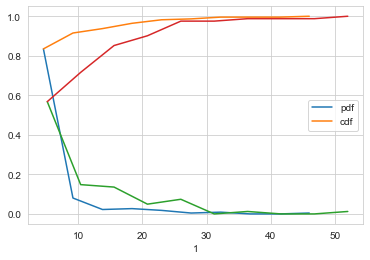

In [9]:
status1 = haberman.loc[haberman["1.1"] == 1];
status2 = haberman.loc[haberman["1.1"] == 2];

counts, bin_edges = np.histogram(status1['1'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(status2['1'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("1")
plt.legend(['pdf','cdf'])
plt.show();

OBSERVATION: From the plot of CDF on Nodes we can determnine having a node value of >= 30 and <=40 will ensure 1%-5% survival chances of patients. Because at >=30, status1 = 100%. Again at >=40 status2 =100%. and between 30 to 40 its around 95%-99%. Hence patients will have 1%-5% of survival chances.

# HISTOGRAM AND PDF OF YEAR.

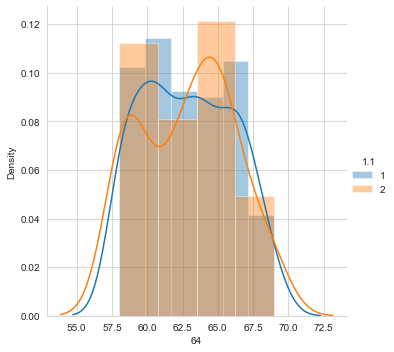

In [10]:
sns.FacetGrid(haberman, hue="1.1", size=5) \
   .map(sns.distplot, "64") \
   .add_legend();
plt.show();

# HISTOGRAM AND PDF OF NODES.

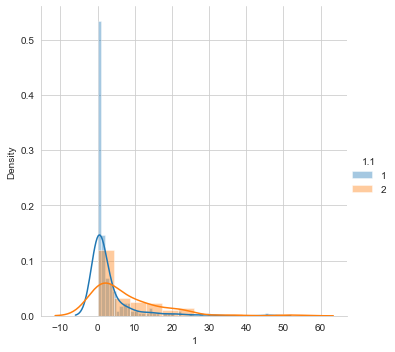

In [11]:
sns.FacetGrid(haberman, hue="1.1", size=5) \
   .map(sns.distplot, "1") \
   .add_legend();
plt.show();


# HISTOGRAM AND PDF OF AGE.

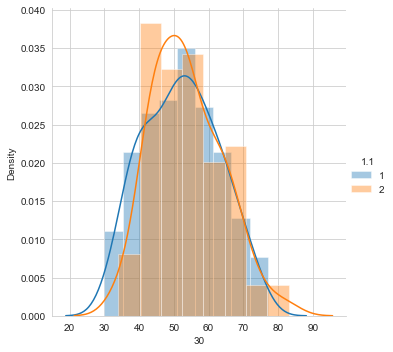

In [12]:
sns.FacetGrid(haberman, hue="1.1", size=5) \
   .map(sns.distplot, "30") \
   .add_legend();
plt.show();

# CONCLUSIONS

1.Dataset is imbalanced with 225 patients surviving 5 years or longer while 81 patients die within 5 years.


2.Even the pdf and histogram analysis dosen't seperate the data as the two classifiers overlap. Pdf of nodes is slightly better than the rest. Between 0-5 node values, there are more chances of survival. Beyond that node value, there are more chances of dying.



3.From the plot of CDF on Nodes we can determnine having a node value of >= 30 and <=40 will ensure 1%-5% survival chances of patients. Because at >=30, status1 = 100%. Again at >=40 status2 =100%. and between 30 to 40 its around 95%-99%. Hence patients will have 1%-5% of survival chances.


4.Between 40-50 years of age patients will have more chances of survival.


5.Between years when the operations were performed on respective patients (1958-1960),(1964-1966),(1967-1969) more patients survived for 5 years or longer after the operation.

In [13]:
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


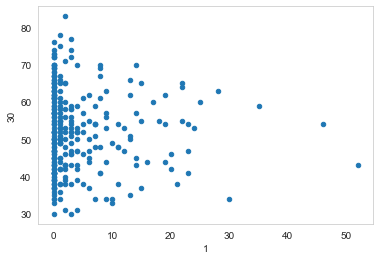

In [14]:
haberman.plot(kind='scatter', x='1', y='30') 
plt.grid()
plt.show()